### CNN알고리즘 참조 블로그
https://gruuuuu.github.io/machine-learning/cnn-doc/

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense,Flatten,Input,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np

### 데이터 로드 및 전처리

In [3]:
(x_train_full,y_train_full), (x_test,y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape,y_test.shape)


170500096/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
print(y_test[5])

[6]


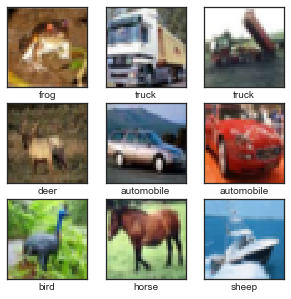

In [6]:
np.random.seed(777)

class_names = ["airplane",'automobile','bird','cat','deer','dog',
               'frog','horse','ship','truck']
sample_size = 9
random_idx = np.random.randint(60000,size=sample_size)

plt.figure(figsize=(5,5))
for i,idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_full[i])
    plt.xlabel(class_names[int(y_train_full[i])])
plt.show() 

In [9]:
x_mean = np.mean(x_train_full, axis=(0,1,2))
x_std = np.std(x_train_full,axis=(0,1,2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std
               

In [10]:
# 30%를 validation data로 뽑음
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.3)


In [11]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 모델 구성 및 컴파일

In [16]:
def model_build():
    model = Sequential()
    
    input = Input(shape=(32, 32, 3))
    
    output = Conv2D(filters=32, kernel_size = 3, padding = 'same', activation = 'relu')(input)
    output = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters=128, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(output)
        
    output = Flatten()(output)
    output = Dense(256,activation='relu')(output)
    output = Dense(128,activation='relu')(output)
    output = Dense(10,activation='softmax')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model
    
    
    

In [17]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0     

### 모델 학습 및 평가

In [19]:
history = model.fit(x_train, y_train,
                   epochs = 30,
                   batch_size=256,
                   validation_data=(x_val,y_val))

Epoch 1/30
137/137 [==============================] - 51s 361ms/step - loss: 2.0594 - accuracy: 0.2569 - val_loss: 1.6215 - val_accuracy: 0.4285
Epoch 2/30
137/137 [==============================] - 47s 346ms/step - loss: 1.5549 - accuracy: 0.4528 - val_loss: 1.4659 - val_accuracy: 0.4801
Epoch 3/30
137/137 [==============================] - 45s 327ms/step - loss: 1.4079 - accuracy: 0.4994 - val_loss: 1.3451 - val_accuracy: 0.5195
Epoch 4/30
137/137 [==============================] - 44s 319ms/step - loss: 1.3162 - accuracy: 0.5322 - val_loss: 1.2730 - val_accuracy: 0.5497
Epoch 5/30
137/137 [==============================] - 44s 324ms/step - loss: 1.2464 - accuracy: 0.5656 - val_loss: 1.2121 - val_accuracy: 0.5758
Epoch 6/30
137/137 [==============================] - 50s 365ms/step - loss: 1.1798 - accuracy: 0.5858 - val_loss: 1.1775 - val_accuracy: 0.5845
Epoch 7/30
137/137 [==============================] - 62s 457ms/step - loss: 1.1319 - accuracy: 0.6050 - val_loss: 1.1419 - val_ac

### 학습과정 시각화

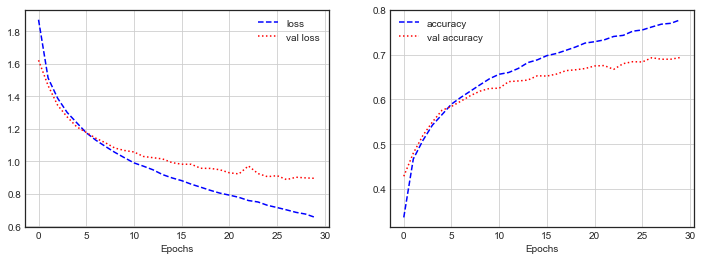

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--', label = 'loss')
plt.plot(history.history['val_loss'],'r:', label = 'val loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b--', label = 'accuracy')
plt.plot(history.history['val_accuracy'],'r:', label = 'val accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

- 해당 모델은 성능이 좋지 않음
- 규제화, 드롭아웃 등 과대적합을 방지함

In [23]:
def model_build2():
    model = Sequential()
    
    input = Input(shape=(32, 32, 3))
    
    output = Conv2D(filters=32, kernel_size = 3, padding = 'same', activation = 'relu')(input)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters=128, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(output)
    output = Dropout(0.5)(output)
        
    output = Flatten()(output)
    output = Dense(256,activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(128,activation='relu')(output)
    output = Dense(10,activation='softmax')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model
    

In [24]:
model = model_build2()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0   

In [26]:
history = model.fit(x_train, y_train,
                   epochs = 30,
                   batch_size=256,
                   validation_data=(x_val,y_val))

Epoch 1/30
137/137 [==============================] - 134s 973ms/step - loss: 3.1238 - accuracy: 0.1603 - val_loss: 2.2259 - val_accuracy: 0.1881
Epoch 2/30
137/137 [==============================] - ETA: 0s - loss: 2.0447 - accuracy: 0.2729

KeyboardInterrupt: 

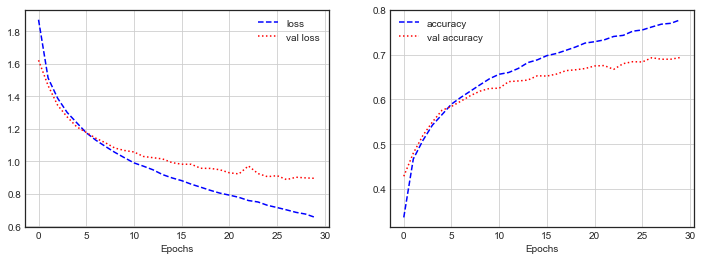

In [25]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--', label = 'loss')
plt.plot(history.history['val_loss'],'r:', label = 'val loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b--', label = 'accuracy')
plt.plot(history.history['val_accuracy'],'r:', label = 'val accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()